In [23]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
def export_figure (title):
    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".png"), dpi=600)
    plt.show()

In [62]:
papers_file = "Simon classification from other papers.xlsx"

In [25]:
originalOptions = {
    "Nature": ["Report", "Analysis", "Experiment", "Study", "Position/proposal"],
    "Scope": ["Subject", "Program/department", "Institution", "Many institutions", "Not applicable"],
    "Context": ["artificial intelligence", "broad-based", "capstone project", "communication skills", "compilers", "cryptography", "data mining", "database", "data structures",  "eBusiness/eCommerce", "ethics/professionalism", "formal methods", "graphics", "groupwork", "hardware/architecture", "human-computer interaction", "information systems", "introduction to IT", "literature",  "logic", "mathematics", "multimedia", "networks", "operating systems", "postgraduate/research", "programming languages", "Programming", "robotics", "school/outreach", "security", "software engineering", "study planning", "systems analysis", "webpage development", "work experience"],
                  "Theme":
                      ["ability/aptitude/understanding", "accessibility", "assessment techniques", "assessment tools", "attitudes", "cheating & plagiarism", "competitions", "credit for prior learning", "curriculum", "educational technology", "ethics/professional issues", "gender issues", "language/culture issues", "online/distance delivery", "recruitment, progression,", "pathways", "research", "teachers", "teaching/learning techniques", "teaching/learning theories & models", "teaching/learning tools", "tutors, demonstrators, mentors"
]
}

newOptions = {
    "Nature":[], "Scope":[],
    "Context": ['service teaching', 'cloud computing', 'data science'],
            "Theme": ['generative AI', 'peer learning/evaluation/feedback', 'inclusion', 'accreditation'],
}

allOptions = originalOptions


all_options_dfs = []
for key, val in newOptions.items():
    allOptions[key] = allOptions[key] + val
    all_options_dfs.append(pd.DataFrame({"Characteristic": key, "Option": allOptions[key]}))

all_options_df = pd.concat(all_options_dfs)
all_options_df.Characteristic.unique()

array(['Nature', 'Scope', 'Context', 'Theme'], dtype=object)

In [26]:
directory = "revised reviews"
dfs = []
for file in ['CEP paper review form 2019 revised', 
            'CEP paper review form 2020_2022 revised',
            'CEP paper review form 2023_2024 revised',
            'CEP paper review form 2025 revised']:
    print("loading ", file)
    dfs.append(pd.read_excel(os.path.join(directory,file + ".xlsx")))
    
df = pd.concat(dfs)


df.columns = df.columns.str.strip()
#print(df.columns)

#cleaning up and creating Year
df.rename(columns={
    'Who are you': 'Rater',
    'Nature (Simon) see classification details': 'Nature',
    'Context (Simon) see classification details. Use "other" if necessary': 'Context',
    'Theme/topic (Simon) see classification details. Use "other" if necessary': 'Theme',
    'Scope (Simon) see classification details': 'Scope',
    'Title of paper (for cross-checking only)': 'Title',
    'UK institutions contributing data/context, select at least one ("no data/context" is an option, only use if there is absolutely nothing: no module titles, no description of year groups etc). Some institutions are titled "University Of..."': 'Institutions'
}, inplace=True)

df['Year'] = df['Which paper'].astype(str).str[:4]

df = df.drop(columns=['Timestamp',
                      'Rater',
                      'Are you primary or secondary reviewer',
                      'Author emails. One per line',
                      'Section headings, top-level only. One per line',
                      'Number of references in the paper',
                      'Institutions',
                      'C'
                     ])

df

loading  CEP paper review form 2019 revised
loading  CEP paper review form 2020_2022 revised
loading  CEP paper review form 2023_2024 revised
loading  CEP paper review form 2025 revised


,Which paper,Title,Nature,Scope,Context,Theme,revision comments,Notes and queries,Year
0,2019_3294016.3294017,Teaching Data Ethics,Report,Subject,ethics/professionalism,curriculum,NaN,NaN,2019
1,2019_3294016.3294017,Teaching Data Ethics,Report,Subject,ethics/professionalism,curriculum,NaN,NaN,2019
2,2019_3294016.3294018,Computing with Codio at Coventry University,Report,Program/department,Programming,curriculum,keep both,NaN,2019
3,2019_3294016.3294018,Computing with Codio at Coventry University,Report,Program/department,Programming,teaching/learning tools,NaN,NaN,2019
4,2019_3294016.3294019,Nurturing Collaboration in an Undergraduate Co...,Report,Subject,groupwork,teaching/learning techniques,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...
19,2025_3702212.3702223,Assessing Software Engineering Students’ Analy...,Report,Subject,software engineering,generative AI,NaN,NaN,2025
20,2025_3702212.3702224,Where Have All the Papers Gone? Priming the pu...,Position/proposal,Many institutions,broad-based,teachers,NaN,NaN,2025
21,2025_3702212.3702224,Where Have All the Papers Gone? Priming the pu...,Position/proposal,Many institutions,broad-based,teachers,NaN,NaN,2025
22,2025_3702212.3702225,Integrating Socially Responsible Computing Com...,Position/proposal,Many institutions,software engineering,ethics/professional issues,NaN,NaN,2025


In [27]:
papers = df['Which paper'].unique()

problems = {}
for paper in papers:
    paper_problems = {}
    paper_df = df[df['Which paper'] == paper]
    
    review_notes = list(paper_df['revision comments'].dropna().unique())
    
    if len(paper_df) !=2:
        paper_problems['count'] = len(paper_df)
        
    for col_should_be_equal in ['Nature', 'Scope', 'Context', 'Theme']:
        uvs = list(paper_df[col_should_be_equal].unique())
        if len(uvs)> 1 and (not ('keep both' in review_notes)):
            paper_problems[col_should_be_equal + "_mismatch"] = uvs
            
    for col, options in allOptions.items():
        uvs = list(paper_df[col].unique())
        if not (all(x in options for x in uvs)):
            paper_problems[col+"_option"] = uvs        
    
    if len(paper_problems)>0:
        paper_problems['notes'] = review_notes 
        problems[paper] = paper_problems
        
problems

{}

In [28]:
df.Theme.unique()

array(['curriculum', 'teaching/learning tools',
       'teaching/learning techniques', 'cheating & plagiarism',
       'ability/aptitude/understanding', 'assessment techniques',
       'recruitment, progression,', 'gender issues',
       'educational technology', 'pathways', 'assessment tools',
       'ethics/professional issues', 'accreditation', 'inclusion',
       'competitions', 'peer learning/evaluation/feedback', 'teachers',
       'tutors, demonstrators, mentors', 'attitudes', 'generative AI',
       'language/culture issues'], dtype=object)

In [29]:
df[df.Theme== "gender issues"]

,Which paper,Title,Nature,Scope,Context,Theme,revision comments,Notes and queries,Year
22,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,software engineering,gender issues,keep both,NaN,2019
23,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,groupwork,gender issues,keep both,NaN,2019
56,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,gender issues,NaN,topic-arguably also assessment techniques,2022
57,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,gender issues,NaN,NaN,2022


In [30]:
df.loc[df.Theme == "gender issues", 'Theme'] = "inclusion"
df[df.Theme=="inclusion"]

,Which paper,Title,Nature,Scope,Context,Theme,revision comments,Notes and queries,Year
22,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,software engineering,inclusion,keep both,NaN,2019
23,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,groupwork,inclusion,keep both,NaN,2019
18,2020_3372356.3372366,Increasing academic diversity and inter-discip...,Report,Program/department,broad-based,inclusion,new category (broadening of gender_,NaN,2020
19,2020_3372356.3372366,Increasing academic diversity and inter-discip...,Report,Program/department,broad-based,inclusion,NaN,"More generally about ""inclusion"" but ""gender"" ...",2020
56,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,inclusion,NaN,topic-arguably also assessment techniques,2022
57,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,inclusion,NaN,NaN,2022


In [47]:
summary_dfs = []

all_reviews = len(df)
characteristic_counts = {}
for characteristic in ['Theme', 'Context', 'Scope', 'Nature']:
    df_characteristic_count = df.groupby(characteristic).count().reset_index()
    df_characteristic_count['Percent'] = 100*df_characteristic_count['Which paper']/all_reviews
    characteristic_counts[characteristic] = df_characteristic_count
    summary_df = df_characteristic_count[[characteristic, "Percent"]].rename(columns = {characteristic : 'Option'})
    summary_df['Percent'] = summary_df['Percent'].astype('float')
    summary_df['Characteristic'] = characteristic
    summary_df['Conference'] = "CEP"
    summary_dfs.append(summary_df)
    

In [63]:
lit_import = pd.read_excel(papers_file).rename(columns = {"Conference(s)": "Conference"})

In [50]:
#lit_import = lit_import[~lit_import["Conference"].isnull()]
#lit_import = lit_import[lit_import.doi.isin(['10.1145/1404520.1404536','10.5555/2449323.2449336', '10.1145/3341525.3387407'])]
lit_import = lit_import[~lit_import['Include in meta'].isnull()]
lit_import = lit_import.drop(columns=['Publication','Quotes/notes','Scheme', 'zotero key', 'SPB checked', 'Include in meta', 'Include in lit review','Paper',"Title", "doi", "Restriction of study", "Quotes/notes", "Years", "Num Papers"])
lit_import_long = lit_import.melt(id_vars=['Conference']).rename(columns={"value": "Percent", "variable": "Option"})

print(lit_import_long[lit_import_long.Conference == 'ITiCSE'])

lit_import_long = lit_import_long[~(lit_import_long.Percent == "na")]
lit_import_long = lit_import_long[~lit_import_long.isnull()]
lit_import_long['Percent'] = lit_import_long['Percent'].astype('float')
lit_import_long = lit_import_long.merge(all_options_df, how="left", on="Option")

print(lit_import_long[lit_import_long.Characteristic.isnull()].Option.unique())
summary_dfs.append(lit_import_long)

    Conference                               Option Percent
0       ITiCSE                               Report    47.0
3       ITiCSE                             Analysis    10.0
6       ITiCSE                           Experiment     4.0
9       ITiCSE                                Study    29.0
12      ITiCSE                    Position/proposal    10.0
15      ITiCSE                              Subject    53.0
18      ITiCSE                   Program/department    12.0
21      ITiCSE                          Institution     1.0
24      ITiCSE                    Many institutions     5.0
27      ITiCSE                       Not applicable    29.0
30      ITiCSE              artificial intelligence     NaN
33      ITiCSE                          broad-based      16
36      ITiCSE                     capstone project       1
39      ITiCSE                            groupwork     NaN
42      ITiCSE                hardware/architecture       2
45      ITiCSE                          

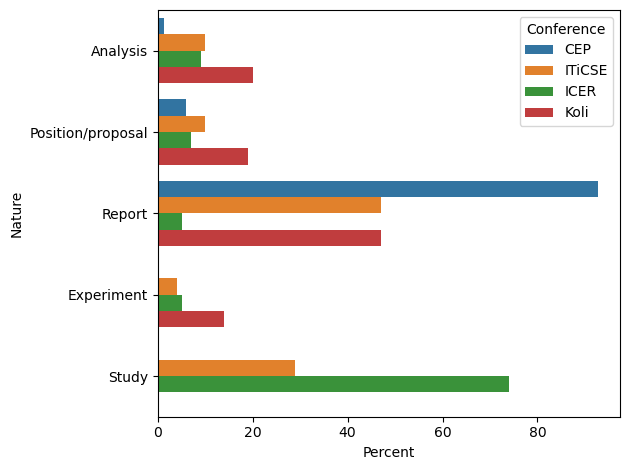

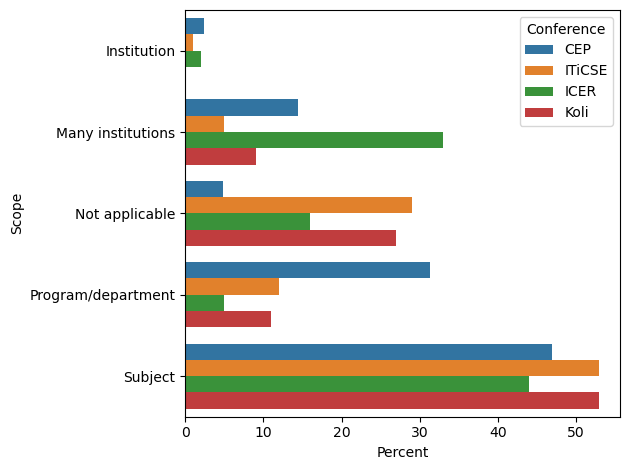

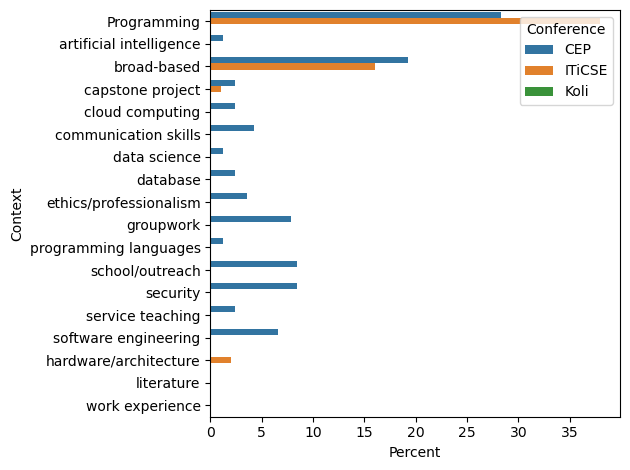

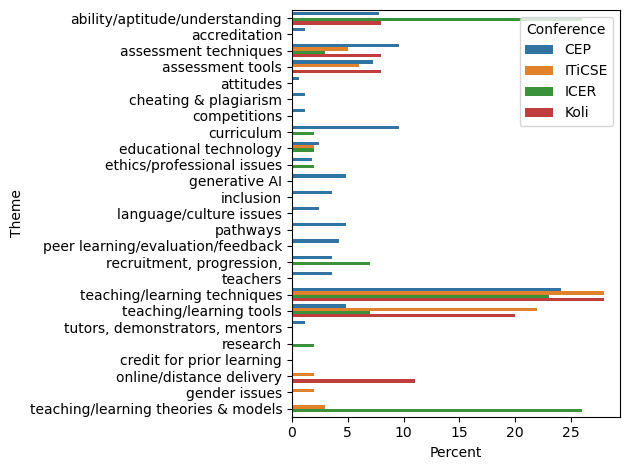

In [51]:
summaries_df = pd.concat(summary_dfs)

for characteristic in ["Nature", "Scope", "Context", "Theme"]:
    g = sns.barplot(data = summaries_df[summaries_df.Characteristic == characteristic], x="Percent", y="Option", hue="Conference")
    g.set_ylabel(characteristic)
    sns.move_legend(g, "upper right")
    export_figure ("compare_"+characteristic)
#  

In [111]:
litrev = pd.read_excel(papers_file).rename(columns = {"Conference(s)": "Conference","Restriction of study": "Restriction"})

litrev=litrev[['zotero key','Publication','Conference','Years','Num Papers', 'Scheme','Restriction']]
litrev['Restriction'] = litrev['Restriction'].fillna(" ")
litrev['zotero key'] = "\cite{"+litrev['zotero key'] + "}"
litrev = litrev.rename(columns={"zotero key":"Ref", "Publication": "Pub", "Scheme":"Analysis"})
litrev = litrev.sort_values("Pub")
litrev =litrev.drop(columns=["Pub"])
print(litrev.to_latex(index=False,escape=False))

\begin{tabular}{llllll}
\toprule
                              Ref &                                Conference &     Years &                      Num Papers &              Analysis &                                      Restriction \\
\midrule
         \cite{valentine_cs_2004} &                                 SICGSE TS & 1984-2003 &                             444 &               Bespoke &                                          CS1/CS2 \\
 \cite{simon_classification_2007} &                                ACE, NACCQ & 2004-2007 &    129~(ACE)\newline 46~(NACCQ) &                 Simon &                                                  \\
           \cite{simon_koli_2007} &                                      Koli & 2001-2006 &                             102 &                 Simon &                                                  \\
    \cite{simon_classifying_2008} &                                      ICER & 2005-2007 &                              43 &                 Simon & 

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_10543/2314869797.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(litrev.to_latex(index=False,escape=False))
